In [1]:
import sklearn
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 0. Описание задачи

Исходная таблица с данными содержит статистику по сотрудникам. Необходимо по значениям признаков узнать, покинет ли сотрудник компанию в ближайшие два года. 10% данных из исходной таблицы было удалено (кроме значений классов).

Признаки:
* Idx - порядковый номер
* Education - уровень образования сотрудника {Bachelors, Masters, Phd}
* JoiningYear - год начала работы в компании {2012, 2013, 2014, 2015, 2016, 2017, 2018}
* City - город, в котором работает сотрудник {Bangalore, Pune, New Delhi}
* PaymentTier - уровень оплаты {1, 2, 3}
* Age - возраст сотрудника
* Gender - пол сотрудника {Male, Female}
* EverBenched - находился ли сотрудник "в запасе" (не работал ни над одним из проектов)
* ExperienceInCurrentDomain - опыт сотрудника в текущем проекте
* LeaveOrNot - покинул ли сотрудник организацию

# 1. Чтение данных

In [2]:
file = "out.csv"
data_raw = pd.read_csv(file)

In [3]:
data_raw.shape

(4653, 10)

In [4]:
data_raw.head()

,Idx,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,Bachelors,2017.0,Bangalore,3.0,34.0,Male,No,0.0,0
1,1,Bachelors,2013.0,Pune,1.0,28.0,Female,No,NaN,1
2,2,Bachelors,NaN,New Delhi,3.0,38.0,Female,No,2.0,0
3,3,Masters,2016.0,Bangalore,3.0,27.0,Male,No,NaN,1
4,4,Masters,2017.0,Pune,3.0,24.0,Male,NaN,2.0,1


In [5]:
data_raw.tail()

,Idx,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4648,4648,Bachelors,2013.0,Bangalore,3.0,26.0,Female,No,4.0,0
4649,4649,Masters,2013.0,Pune,2.0,37.0,Male,No,NaN,1
4650,4650,Masters,2018.0,NaN,3.0,27.0,Male,No,5.0,1
4651,4651,Bachelors,2012.0,Bangalore,NaN,30.0,Male,Yes,2.0,0
4652,4652,Bachelors,2015.0,Bangalore,3.0,33.0,NaN,Yes,4.0,0


Удалим столбец с индексом

In [6]:
data_raw = data_raw.drop('Idx', axis=1)

In [7]:
data_raw.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [8]:
data_raw.dtypes

Education                     object
JoiningYear                  float64
City                          object
PaymentTier                  float64
Age                          float64
Gender                        object
EverBenched                   object
ExperienceInCurrentDomain    float64
LeaveOrNot                     int64
dtype: object

Приведем объектные типы к категориальным

In [9]:
data_raw['Education'] = data_raw['Education'].astype('category')
data_raw['City'] = data_raw['City'].astype('category')
data_raw['Gender'] = data_raw['Gender'].astype('category')
data_raw['EverBenched'] = data_raw['EverBenched'].astype('category')

In [10]:
data_raw.dtypes

Education                    category
JoiningYear                   float64
City                         category
PaymentTier                   float64
Age                           float64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain     float64
LeaveOrNot                      int64
dtype: object

# Визуализировать данные и вычислить основные характеристики (среднее, разброс, корреляционную матрицу и т.д.). Интерпретировать. 

Визуализируем соотношение целевой переменной

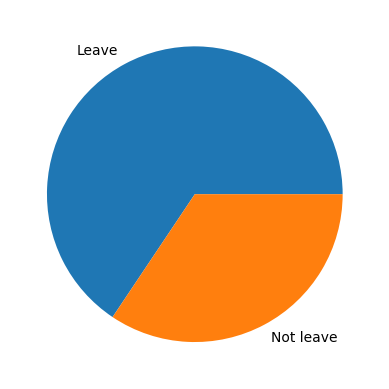

In [11]:
plt.pie(data_raw.LeaveOrNot.value_counts(), labels = ["Leave", "Not leave"])
pass

Получим характеристики количественных и категориальных признаков

In [12]:
data_raw.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4160.000000,4128.000000,4127.000000,4180.000000,4653.000000
mean,2015.056971,2.693072,29.351587,2.894498,0.343864
std,1.864069,0.564288,4.796762,1.567075,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,2.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


In [13]:
data_raw.describe(include = ['category'])

,Education,City,Gender,EverBenched
count,4158,4100,4110,4074
unique,3,3,2,2
top,Bachelors,Bangalore,Male,No
freq,3211,1988,2472,3661


Матрица корреляции и её визуализация

In [14]:
corr = data_raw.corr(numeric_only=True)
corr

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.100896,0.011305,-0.038477,0.184744
PaymentTier,-0.100896,1.000000,0.016448,0.010714,-0.196816
Age,0.011305,0.016448,1.000000,-0.140187,-0.048199
ExperienceInCurrentDomain,-0.038477,0.010714,-0.140187,1.000000,-0.036289
LeaveOrNot,0.184744,-0.196816,-0.048199,-0.036289,1.000000


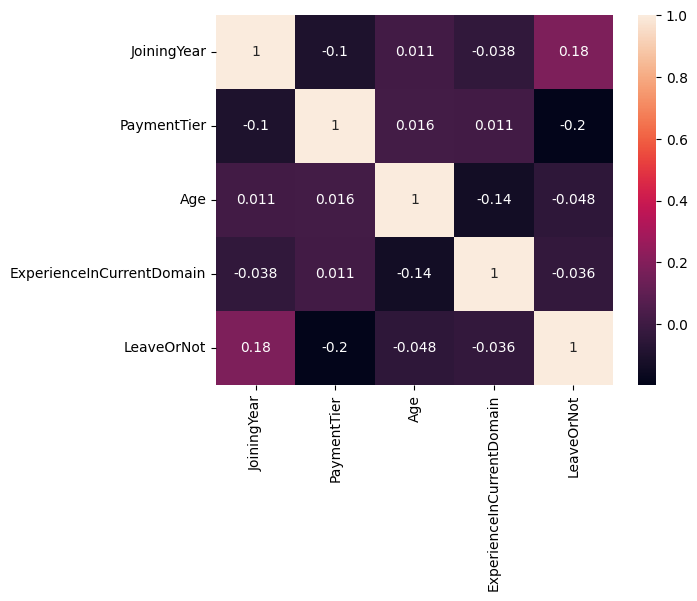

In [15]:
sns.heatmap(corr, annot = True)
pass

Видно, что признаки практически не коррелируют между собой. Это ожидаемо, учитывая суть самих признаков.

# Обработка пропущенных значений

In [16]:
data_raw.isna().sum() # Количество NaN в каждом признаке

Education                    495
JoiningYear                  493
City                         553
PaymentTier                  525
Age                          526
Gender                       543
EverBenched                  579
ExperienceInCurrentDomain    473
LeaveOrNot                     0
dtype: int64

In [17]:
data_raw.count() # Количество не-NaN в каждом признаке

Education                    4158
JoiningYear                  4160
City                         4100
PaymentTier                  4128
Age                          4127
Gender                       4110
EverBenched                  4074
ExperienceInCurrentDomain    4180
LeaveOrNot                   4653
dtype: int64

Заполним пропущенные значения для количественных признаков медианным значением, а для категориальных - самым часто встречающимся. Учитывая относительно небольшое количество выбросов (10%) это не должно существенно повлиять на результат.

In [18]:
data_raw.dtypes

Education                    category
JoiningYear                   float64
City                         category
PaymentTier                   float64
Age                           float64
Gender                       category
EverBenched                  category
ExperienceInCurrentDomain     float64
LeaveOrNot                      int64
dtype: object

In [19]:
data_raw.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3.0,34.0,Male,No,0.0,0
1,Bachelors,2013.0,Pune,1.0,28.0,Female,No,NaN,1
2,Bachelors,NaN,New Delhi,3.0,38.0,Female,No,2.0,0
3,Masters,2016.0,Bangalore,3.0,27.0,Male,No,NaN,1
4,Masters,2017.0,Pune,3.0,24.0,Male,NaN,2.0,1
5,Bachelors,2016.0,Bangalore,NaN,22.0,Male,No,0.0,0
6,Bachelors,2015.0,New Delhi,3.0,NaN,Male,No,0.0,0
7,Bachelors,2016.0,Bangalore,3.0,34.0,Female,NaN,2.0,1
8,NaN,2016.0,Pune,3.0,23.0,Male,No,1.0,0
9,NaN,2017.0,New Delhi,2.0,37.0,Male,No,2.0,0


In [20]:
stat = data_raw.describe(include = ['category'])

data_raw['Education'].fillna(stat['Education'].top, inplace = True)
data_raw['JoiningYear'].fillna(data_raw['JoiningYear'].median(axis = 0), inplace = True)
data_raw['City'].fillna(stat['City'].top, inplace = True)
data_raw['PaymentTier'].fillna(data_raw['PaymentTier'].median(axis = 0), inplace = True)
data_raw['Age'].fillna(data_raw['Age'].median(axis = 0), inplace = True)
data_raw['Gender'].fillna(stat['Gender'].top, inplace = True)
data_raw['EverBenched'].fillna(stat['EverBenched'].top, inplace = True)
data_raw['ExperienceInCurrentDomain'].fillna(data_raw['ExperienceInCurrentDomain'].median(axis = 0), inplace = True)

In [21]:
data_raw.isna().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [22]:
data_raw.count()

Education                    4653
JoiningYear                  4653
City                         4653
PaymentTier                  4653
Age                          4653
Gender                       4653
EverBenched                  4653
ExperienceInCurrentDomain    4653
LeaveOrNot                   4653
dtype: int64

In [23]:
data_raw.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017.0,Bangalore,3.0,34.0,Male,No,0.0,0
1,Bachelors,2013.0,Pune,1.0,28.0,Female,No,3.0,1
2,Bachelors,2015.0,New Delhi,3.0,38.0,Female,No,2.0,0
3,Masters,2016.0,Bangalore,3.0,27.0,Male,No,3.0,1
4,Masters,2017.0,Pune,3.0,24.0,Male,No,2.0,1
5,Bachelors,2016.0,Bangalore,3.0,22.0,Male,No,0.0,0
6,Bachelors,2015.0,New Delhi,3.0,28.0,Male,No,0.0,0
7,Bachelors,2016.0,Bangalore,3.0,34.0,Female,No,2.0,1
8,Bachelors,2016.0,Pune,3.0,23.0,Male,No,1.0,0
9,Bachelors,2017.0,New Delhi,2.0,37.0,Male,No,2.0,0


# 4. Обработать категориальные признаки

Приведем категориальные признаки к числовым, заранее сохранив категориальные

In [24]:
category_cols = []
for col in data_raw.columns:
    print(data_raw[col].dtype)
    if data_raw[col].dtype == 'category':
        category_cols.append(col)

category
float64
category
float64
float64
category
category
float64
int64


In [25]:
data_raw['Education'] = pd.factorize(data_raw['Education'])[0]
data_raw['Gender'] = pd.factorize(data_raw['Gender'])[0]
data_raw['EverBenched'] = pd.factorize(data_raw['EverBenched'])[0]
data_raw['LeaveOrNot'] = pd.factorize(data_raw['LeaveOrNot'])[0]
data_raw['City'] = pd.factorize(data_raw['City'])[0]

In [26]:
data_raw.dtypes

Education                      int64
JoiningYear                  float64
City                           int64
PaymentTier                  float64
Age                          float64
Gender                         int64
EverBenched                    int64
ExperienceInCurrentDomain    float64
LeaveOrNot                     int64
dtype: object

In [27]:
data_raw.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017.0,0,3.0,34.0,0,0,0.0,0
1,0,2013.0,1,1.0,28.0,1,0,3.0,1
2,0,2015.0,2,3.0,38.0,1,0,2.0,0
3,1,2016.0,0,3.0,27.0,0,0,3.0,1
4,1,2017.0,1,3.0,24.0,0,0,2.0,1


In [28]:
data_raw.describe()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,0.237051,2015.050935,0.671395,2.727703,29.198796,0.352031,0.088760,2.905222,0.343864
std,0.497961,1.762617,0.809786,0.540294,4.537678,0.477655,0.284427,1.485615,0.475047
min,0.000000,2012.000000,0.000000,1.000000,22.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2014.000000,0.000000,3.000000,26.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,2015.000000,0.000000,3.000000,28.000000,0.000000,0.000000,3.000000,0.000000
75%,0.000000,2017.000000,1.000000,3.000000,31.000000,1.000000,0.000000,4.000000,1.000000
max,2.000000,2018.000000,2.000000,3.000000,41.000000,1.000000,1.000000,7.000000,1.000000


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
Education,1.000000,0.138575,0.308896,-0.110783,-0.011727,-0.009300,-0.043866,-0.000715,0.085163
JoiningYear,0.138575,1.000000,0.129801,-0.084976,0.007791,0.011890,0.030428,-0.034522,0.174958
City,0.308896,0.129801,1.000000,-0.198660,-0.046861,0.175202,-0.013333,-0.013922,0.079220
PaymentTier,-0.110783,-0.084976,-0.198660,1.000000,0.018840,-0.194890,0.013231,0.012833,-0.184525
Age,-0.011727,0.007791,-0.046861,0.018840,1.000000,-0.007798,-0.001849,-0.119429,-0.046478
Gender,-0.009300,0.011890,0.175202,-0.194890,-0.007798,1.000000,0.000967,0.009465,0.193970
EverBenched,-0.043866,0.030428,-0.013333,0.013231,-0.001849,0.000967,1.000000,-0.012645,0.082703
ExperienceInCurrentDomain,-0.000715,-0.034522,-0.013922,0.012833,-0.119429,0.009465,-0.012645,1.000000,-0.034223
LeaveOrNot,0.085163,0.174958,0.079220,-0.184525,-0.046478,0.193970,0.082703,-0.034223,1.000000


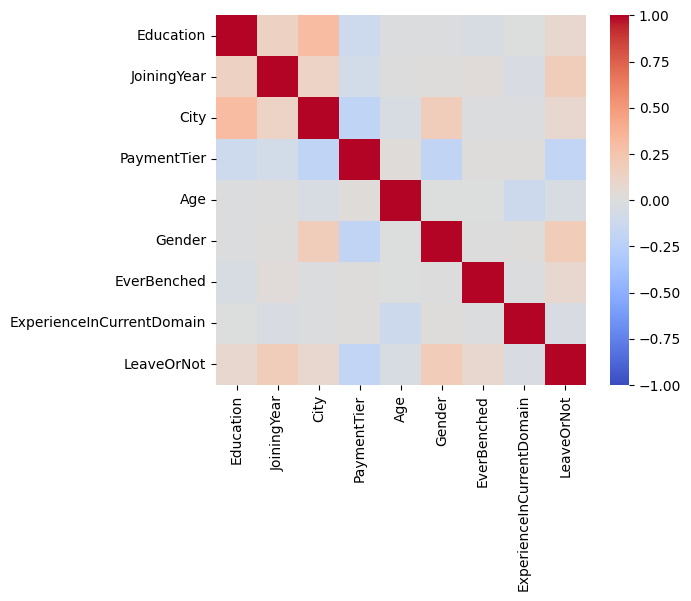

In [29]:
corr = data_raw.corr(numeric_only=True)
sns.heatmap(corr, square=True, cmap='coolwarm', vmin = -1, vmax = 1)
pass
corr

Видно, что параметры City и Education немного (~31%) коррелируют, но в рамках этой задачи такую степень корреляции можно проигнорировать.

# 5. Нормализация

Нормализуем данные в столбцах JoiningYear и Age

In [30]:
data_raw['JoiningYear'] = data_raw['JoiningYear'] / data_raw['JoiningYear'].max()
data_raw['Age'] = data_raw['Age'] / data_raw['Age'].max()
data_raw.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,0.999504,0,3.0,0.829268,0,0,0.0,0
1,0,0.997522,1,1.0,0.682927,1,0,3.0,1
2,0,0.998513,2,3.0,0.926829,1,0,2.0,0
3,1,0.999009,0,3.0,0.658537,0,0,3.0,1
4,1,0.999504,1,3.0,0.585366,0,0,2.0,1


# 6. Разбить данные на обучающую и тестовую выборки

In [31]:
y = data_raw['LeaveOrNot']
x = data_raw.drop(['LeaveOrNot'], axis=1)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.3, random_state = 13)

# 7. Запустить классификатор ближайших соседей (попробовать разное их количество)

## KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
KNNScore = 0
bestN = 1
for kNeighbors in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=kNeighbors)
    knn.fit(xTrain, yTrain)
    trainScore = knn.score(xTrain, yTrain)
    testScore = knn.score(xTest, yTest)
    if (testScore > KNNScore):
        KNNScore = testScore
        bestN = kNeighbors
    print(f"Точность с n = {kNeighbors} соседями на\nТренировочной выборке: {trainScore}\nТестовой выборке: {testScore}\n")

print("Минимальная ошибка на тестовой выборке для метода KNN: ", 1 - KNNScore)

Точность с n = 1 соседями на
Тренировочной выборке: 0.9038992938286767
Тестовой выборке: 0.6998567335243553

Точность с n = 3 соседями на
Тренировочной выборке: 0.841264967761744
Тестовой выборке: 0.7399713467048711

Точность с n = 5 соседями на
Тренировочной выборке: 0.8188517040221063
Тестовой выборке: 0.7636103151862464

Точность с n = 7 соседями на
Тренировочной выборке: 0.8056493705864293
Тестовой выборке: 0.7679083094555874

Точность с n = 9 соседями на
Тренировочной выборке: 0.7930610991710163
Тестовой выборке: 0.7679083094555874

Точность с n = 11 соседями на
Тренировочной выборке: 0.7890696960393
Тестовой выборке: 0.7671919770773639

Точность с n = 13 соседями на
Тренировочной выборке: 0.7823150138163955
Тестовой выборке: 0.7628939828080229

Точность с n = 15 соседями на
Тренировочной выборке: 0.7755603315934909
Тестовой выборке: 0.7621776504297995

Точность с n = 17 соседями на
Тренировочной выборке: 0.7709548664415106
Тестовой выборке: 0.7571633237822349

Точность с n = 19 с

## SVC

In [34]:
from sklearn.svm import SVC

In [35]:
svc = SVC(gamma = 'auto')
svc.fit(xTrain, yTrain)
trainScore = svc.score(xTrain, yTrain)
testScore = svc.score(xTest, yTest)
SVCScore = testScore
print(f"Точность на\nТренировочной выборке: {trainScore}\nТестовой выборке: {testScore}\n")

Точность на
Тренировочной выборке: 0.7163033466380104
Тестовой выборке: 0.7134670487106017



## Random Forest

In [36]:
from sklearn import ensemble

In [37]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(xTrain, yTrain)
trainScore = rfc.score(xTrain, yTrain)
testScore = rfc.score(xTest, yTest)
RFCScore = testScore
print(f"Точность на\nТренировочной выборке: {trainScore}\nТестовой выборке: {testScore}\n")

Точность на
Тренировочной выборке: 0.9247774025176543
Тестовой выборке: 0.7987106017191977



## Ada Boost Classifier

In [38]:
abc = ensemble.AdaBoostClassifier()
abc.fit(xTrain, yTrain)
trainScore = abc.score(xTrain, yTrain)
testScore = abc.score(xTest, yTest)
ABCScore = testScore
print(f"Точность на\nТренировочной выборке: {trainScore}\nТестовой выборке: {testScore}\n")

Точность на
Тренировочной выборке: 0.7863064169481118
Тестовой выборке: 0.7851002865329513



## Результаты

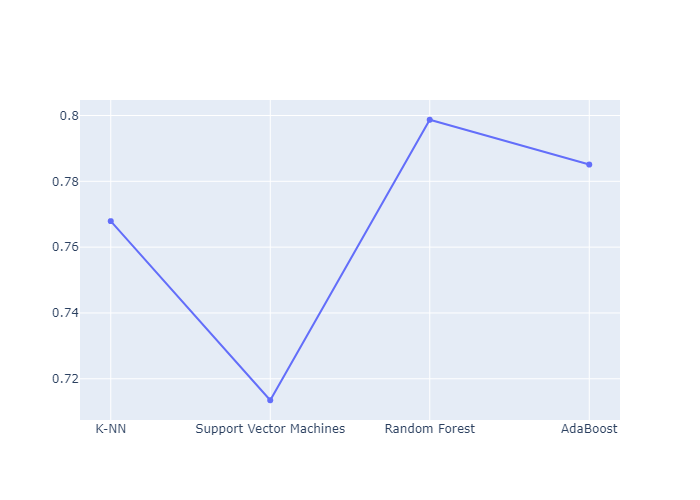

In [39]:
import plotly.express as px
import plotly.graph_objects as go

scores = [KNNScore, SVCScore, RFCScore, ABCScore]
algs = ["K-NN","Support Vector Machines","Random Forest","AdaBoost"]

fig1 = px.line(x=algs,
               y=scores)

fig2 = px.scatter(x=algs,
                 y=scores)

fig3 = go.Figure(data=fig1.data + fig2.data)
fig3.show("png")

# Вывод

По результатам запуска различных алгоритмов, наилучшую точность показал классификатор Random Forest (~80%). Большой показатель ошибки во всех использованных алгоритмах отчасти обусловлен фактором случайности в решении человека об уходе из компании. Имеющиеся данные не в полной мере обуславливают этот выбор. Но всё же полученный результат предсказания достаточно неплохо предугадывает, покинет человек свое место работы или нет.